<a href="https://colab.research.google.com/github/Raruu/Machine-Learning-2025/blob/main/JS04/JS04_Praktikum1_2341720157_Hidayat_Widi_Saputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

### KMeans

KMeans adalah satu metode unsupervised learning pada machine learning. Metode ini menentukan jumlah cluster sesuai dengan jumlah kk yang dipilih. Proses KMeans secara manual, dapat dilihat pada tautan berikut,

In [2]:
!wget -O Iris.csv https://3041032130-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2F5CvtE8Xh9b75jKUaRr5Y%2Fuploads%2FxUePALvHkIiJfbEFZdaJ%2FIris.csv?alt=media

try:
  from google.colab import output
  output.clear()
except:
  pass


#### Persiapan data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Seleksi fitur

In [6]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Plot data
Karena data 4 dimensi, maka akan kita coba
plot cluster berdasarkan Sepal Length dan Sepal Width  saja

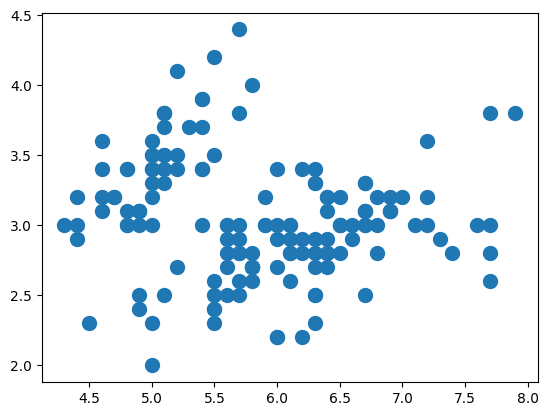

In [7]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)

#### Buat Model KMeans
Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

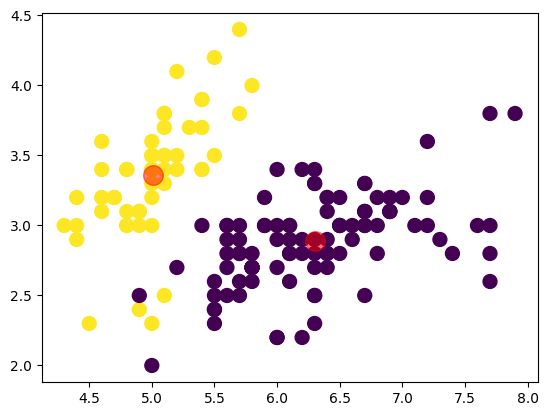

In [8]:
from sklearn.cluster import KMeans

cl_kmeans = KMeans(n_clusters=2)

y_kmeans = cl_kmeans.fit_predict(X)

# plot hasil cluster berdasarkan sepal length dan sepal width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=100)

# plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [9]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


#### Implementasi Metode Elbow

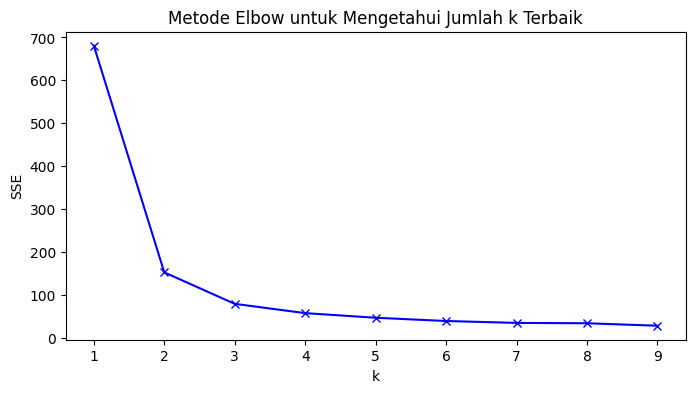

In [10]:
# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

#### Cek Nilai SSE setiap k

In [11]:
for idx, sse_val in enumerate(sse, start=1):
  print(f'k={idx+1}: {sse_val}')

k=2: 680.8243999999996
k=3: 152.36870647733915
k=4: 78.94506582597728
k=5: 57.317873214285726
k=6: 46.56163015873017
k=7: 38.95373036498037
k=8: 34.555011618928035
k=9: 33.69442661913251
k=10: 27.964318181818197
